<a href="https://colab.research.google.com/github/AhmedCoolProjects/ML/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression: Categorical binary target. 
* Probability of having heart attack.
* Mortality in injured patients.
* Customer's propensity to purchase a product or halt a subscribe.
* Failure of a given process or product.

> binary.

> probability of the predictions.

> linear decision boundary.

> impact of the feature.

**Sigmoid function**: logistic regression:

*0 <= σ(θ'T.X) <= 1*

*σ(θ'T.X)=1/(1+(exp(-θ'T.X))*

* P(Y=1|X) => probability Y belong to 1 with X given.
* P(Y=0|X) = 1 - P(Y=1|X).

1. Initialize θ.
2. Calculate y_hat = σ(θ'T.X) foreach.
3. Evaluation of the model.
4. Calculating the Error. cost.
5. Change the θ to reduce the cost.
6. Go back to step 2.

**Cost**: cost(**y**,y) = (1/2).(σ(θ'T.X) - Y)^2

J(θ) = MSE = (1/m).Σ cost(**y**,y)

> difficult to get the global min even by deriving.

Our goal: 
* **y**=1 & y=1 => cost=0
* **y**=0 & y=1 => cost -> +infini (very large)

> -log(**y**)

> cost(**y**,y) = 
* -log(**y**) if(y=1)
* -log(1-**y**) if(y=0)

*J(θ) = -(1/m).Σ[(y^i).log(**y**^i)] + [(1 - y^i).log(**y**^i)]*

Our goal: finding the best parameters for our model **by** minimizing the cost function **by** Optemization approach.
* **Gradient Descent**: technique to use the derivative of a cost function to change the parameter values in oreder to minimize the cost.


#Logistic Regression
## Customer Churn

In [18]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# downloading the dataset.
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/ChurnData.csv

--2021-07-09 15:53:02--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K  --.-KB/s    in 0.02s   

2021-07-09 15:53:02 (2.13 MB/s) - ‘ChurnData.csv’ saved [35943/35943]



In [20]:
df = pd.read_csv('/content/ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [22]:
df['churn'] = df['churn'].astype('int')
X = df[['tenure','age','address','income','ed','employ','equip']].values
X[:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [23]:
Y = df[['churn']].values
Y[:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

In [24]:
# normalize our dataset.
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [25]:
# train test dataset.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(160, 7) (40, 7)
(160, 1) (40, 1)


In [26]:
# build the model.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
LR

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pre = LR.predict(x_test)

In [28]:
print(y_test[:5],y_pre[:5])

[[0]
 [0]
 [1]
 [0]
 [1]] [0 0 0 0 0]


In [29]:
y_pre_proba = LR.predict_proba(x_test)
y_pre_proba[:5]

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161]])

In [30]:
# jaccard index evaluation: the size of intersection divided by the size of the union.
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,y_pre)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.75

In [36]:
# confusion matrix evaluation.
from sklearn.metrics import confusion_matrix,classification_report
import itertools
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
print(confusion_matrix(y_test,y_pre,labels=[1,0]))


[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


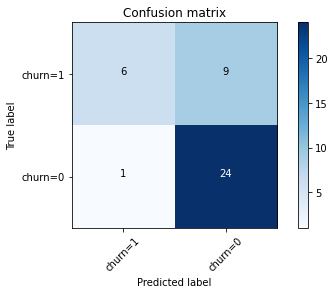

In [37]:
# compute confusion matrix
conf_matrix = confusion_matrix(y_test,y_pre,labels=[1,0])
np.set_printoptions(precision=2)
# plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix,classes=['churn=1','churn=0'],normalize=False,title='Confusion matrix')

In [47]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [49]:
# log loss
from sklearn.metrics import log_loss
log_loss(y_test,y_pre_proba)

0.6017092478101185

In [50]:
# with different solver and regularisation
LR2 = LogisticRegression(C=0.01,
                         solver='sag').fit(x_train,y_train)
y_pre2_proba = LR2.predict_proba(x_test)
print("LogLoss: %.2f" % log_loss(y_test,y_pre2_proba))

LogLoss: 0.61


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
